In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [105]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [107]:
df.duplicated().any()

False

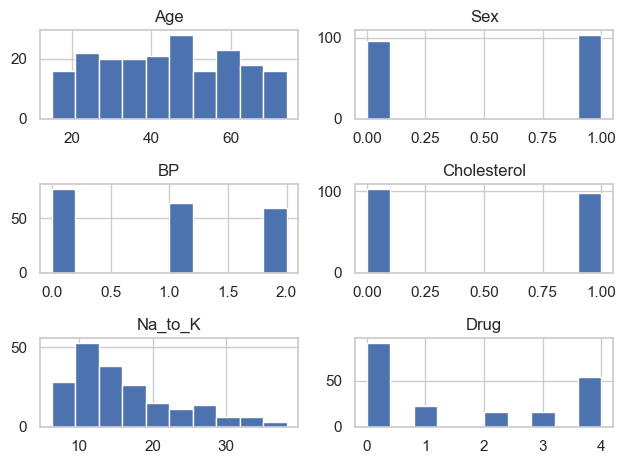

In [109]:
df.hist()
plt.tight_layout()

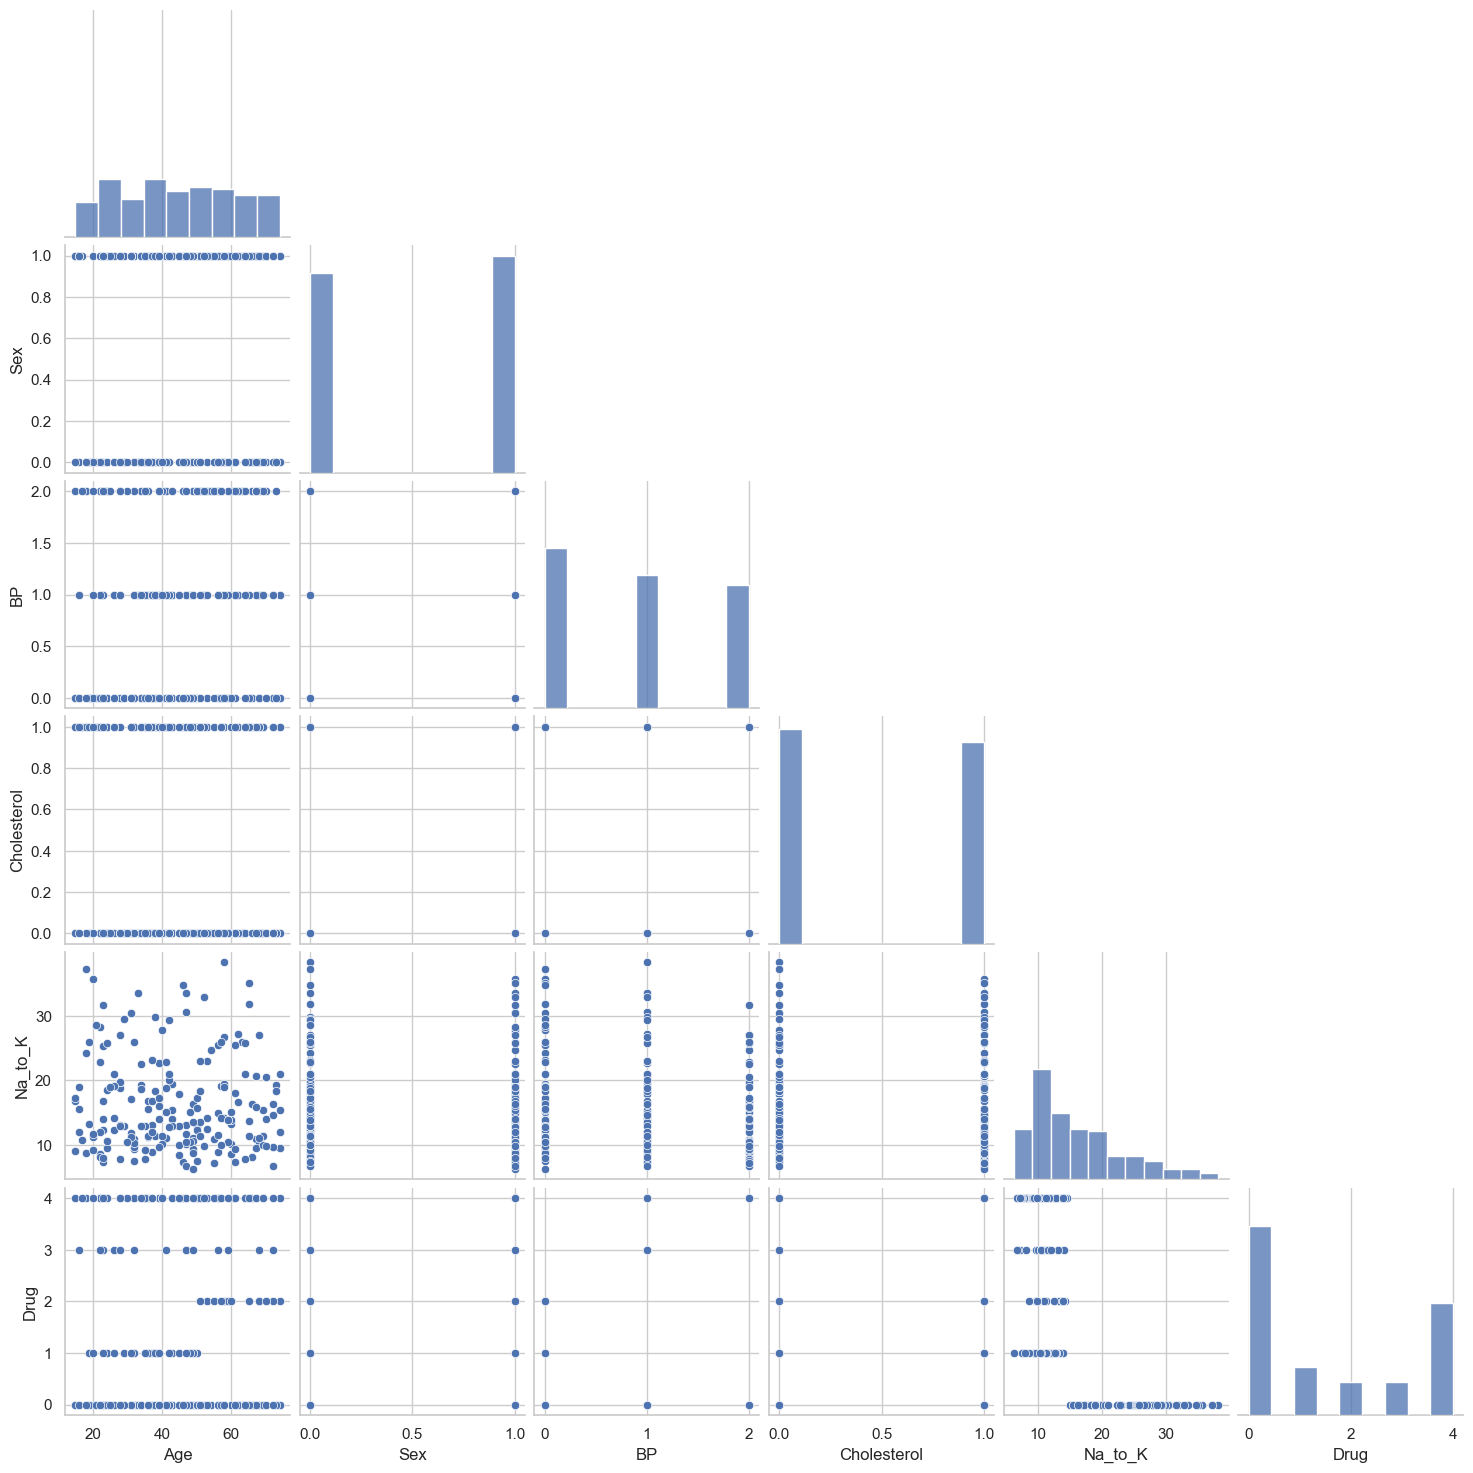

In [110]:
sns.pairplot(df, corner=True)

<AxesSubplot:>

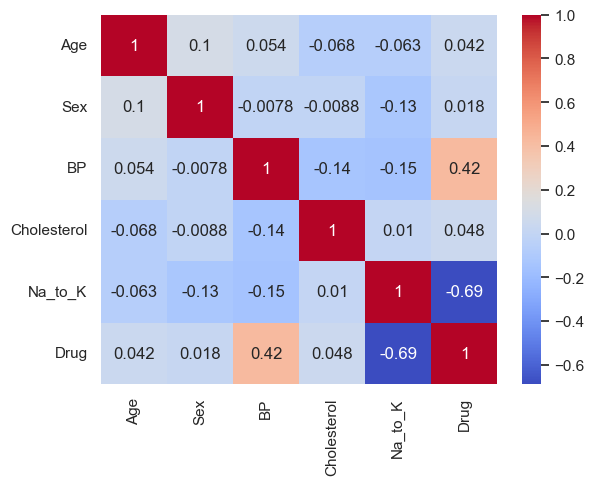

In [108]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [88]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['Drug']=class_le.fit_transform(df['Drug'].values)
df['Sex']=class_le.fit_transform(df['Sex'].values)
df['BP']=class_le.fit_transform(df['BP'].values)
df['Cholesterol']=class_le.fit_transform(df['Cholesterol'].values)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [90]:
X = df.drop(columns='Drug')
y = df['Drug']

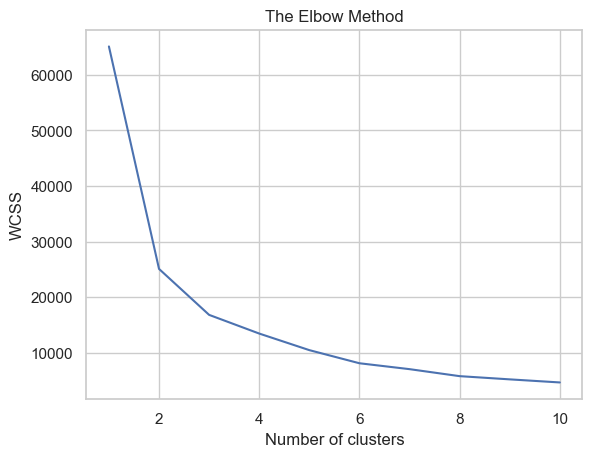

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [92]:
kmeans=KMeans(n_clusters= 4, init = 'k-means++', max_iter = 150, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)
print(Y_Kmeans)


[1 3 3 1 0 1 3 3 0 3 3 1 3 0 3 1 0 3 1 1 2 2 2 3 1 1 1 3 3 3 1 0 3 2 3 3 1
 3 3 1 0 0 3 1 3 0 3 0 1 1 2 0 2 1 0 1 0 3 0 1 3 1 0 3 0 2 1 1 2 1 0 1 1 3
 1 1 3 1 1 1 0 0 1 3 3 0 3 0 3 3 0 3 1 2 0 3 2 2 1 1 1 3 1 0 1 3 1 3 0 1 3
 3 3 0 1 3 0 3 1 2 1 1 1 3 3 1 0 3 2 1 0 2 3 1 3 0 0 3 3 0 3 2 0 0 3 0 3 1
 0 1 3 0 0 0 3 3 1 2 0 3 1 0 3 1 1 3 2 0 2 1 1 3 3 3 3 0 3 1 3 0 1 0 1 3 1
 2 0 3 2 0 2 1 0 0 2 0 1 3 1 3]


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

Accuracy of Decision Tree:  87.5 %



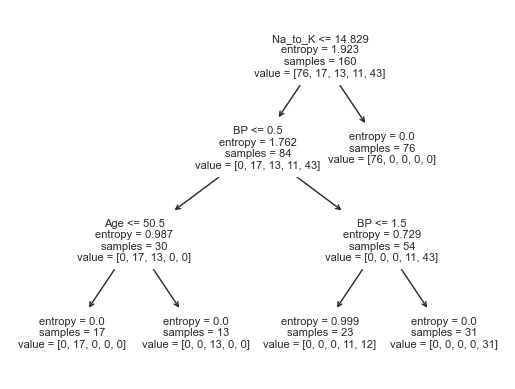

In [95]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth= 3,random_state = 0)
tree.fit(X_train, y_train)
plot_tree(tree, feature_names = df.columns ,fontsize = 8)
y_pred_test = tree.predict(X_test)
print("Accuracy of Decision Tree: ", accuracy_score(y_test, y_pred_test)*100, "%\n")
dtree_score = round(tree.score(X_test, y_test) * 100 ,2)


Confusion Matrix of Decision Tree


Text(47.25, 0.5, 'Actual')

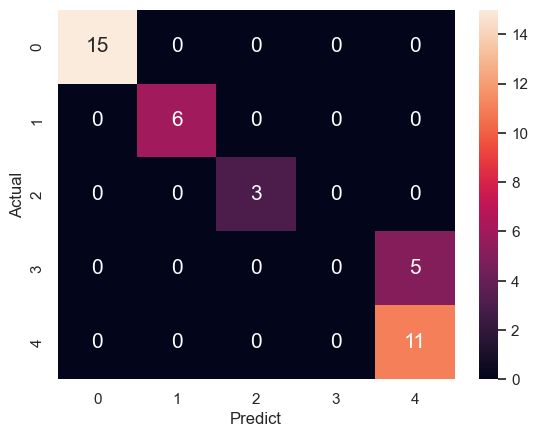

In [96]:
print("Confusion Matrix of Decision Tree")
cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [98]:
sc = StandardScaler()
sc.fit(X_train)
StandardScaler(copy= True,with_mean= True, with_std= True )
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Accuracy of Perceptron: 92.5 %



Text(47.25, 0.5, 'Actual')

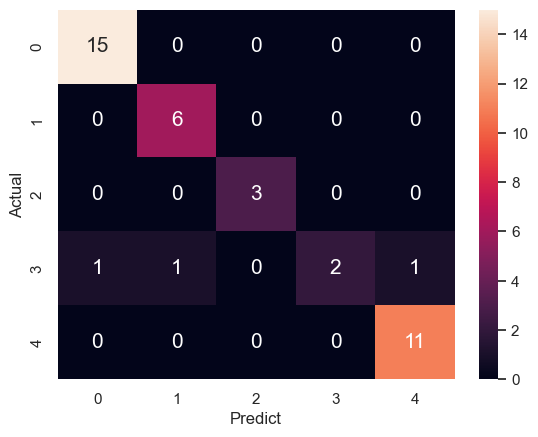

In [99]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred_ppn = ppn.predict(X_test_std)
print('Accuracy of Perceptron:', accuracy_score(y_test, y_pred_ppn) * 100, "%\n")

perceptron_score = round(accuracy_score(y_test, y_pred_ppn) * 100 , 2)
cm = confusion_matrix(y_test,y_pred_ppn)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

Accuracy of Logistic Regression: 80.0 %



c:\Users\cüneyt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(47.25, 0.5, 'Actual')

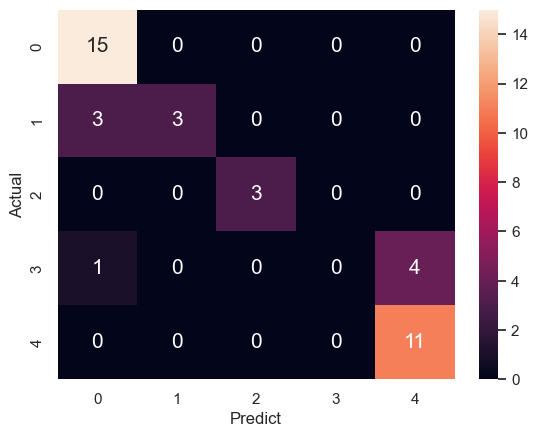

In [100]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_logistic = LR.predict(X_test)
print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_pred_logistic) * 100, "%\n")

logreg_score = round(accuracy_score(y_test, y_pred_logistic) * 100 ,2)
cm = confusion_matrix(y_test,y_pred_logistic)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")


Accuracy of Random Forest: 100.0% 



Text(47.25, 0.5, 'Actual')

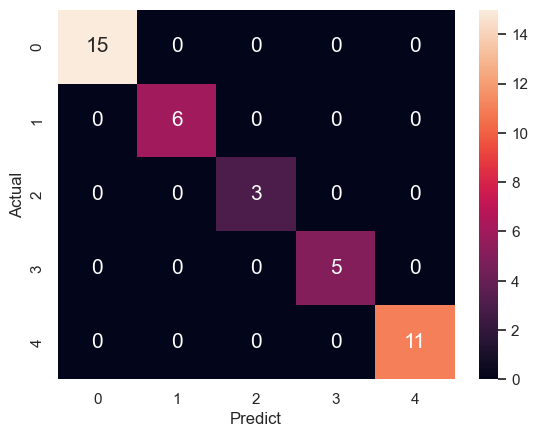

In [101]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)
forest_predictions[0:10]
y_test[0:10]
print("Accuracy of Random Forest: {}%".format(forest.score(X_test, y_test) * 100 ), "\n")
randomf_score = round(forest.score(X_test, y_test) * 100 ,2)

cm = confusion_matrix(y_test,forest_predictions)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")


Accuracy of SVC:  100.0 %



Text(47.25, 0.5, 'Actual')

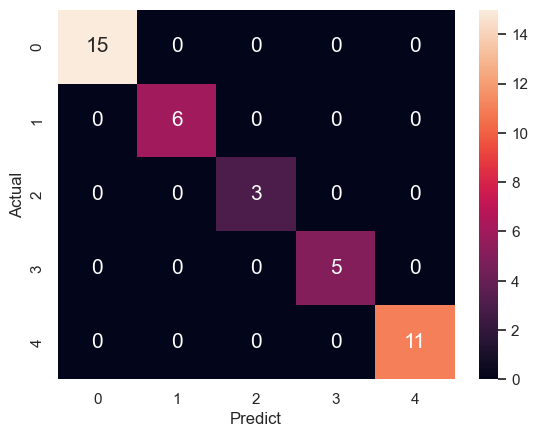

In [102]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 42)
svm.fit(X_train, y_train)
y_svm_test = svm.predict(X_test)
print("Accuracy of SVC: ", accuracy_score(y_test, y_svm_test) * 100, "%\n")
svc_score = round(accuracy_score(y_test, y_svm_test) * 100)

cm = confusion_matrix(y_test,y_svm_test)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [103]:
CompareModels = pd.DataFrame({
    'model' : [ 'Perceptron' , 'Logistic Regression' , 'Decision Tree' ,
    'Random Forest' , 'SVC' ] ,
    'score' : [  perceptron_score ,logreg_score , dtree_score ,
    randomf_score, svc_score
    ]  } )


[Text(0.5, 1.0, 'Score vs Model')]

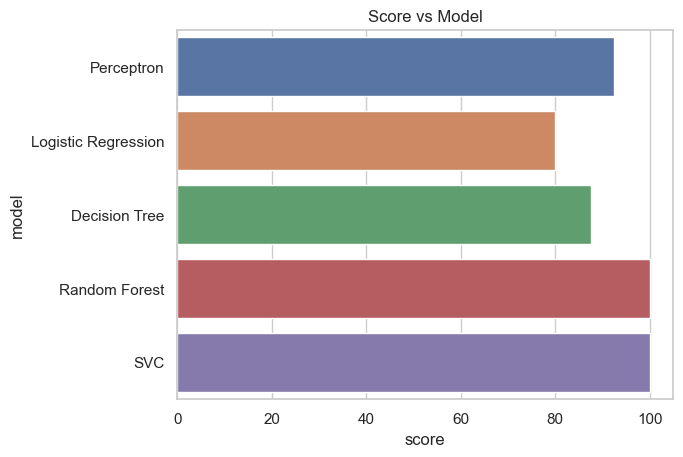

In [104]:
sns.set_theme(style="whitegrid")
sns.barplot(x='score' , y='model' , data=CompareModels).set(title='Score vs Model')